<a href="https://colab.research.google.com/github/pratyaksh12/C115proj/blob/main/C115proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import csv
import statistics as st
import plotly.express as px
import plotly.figure_factory as ff

from google.colab import files
data_to_load=files.upload()

Saving C115proj.csv to C115proj.csv


In [3]:
df=pd.read_csv('C115proj.csv')
velocity_list=df['Velocity'].tolist()
escaped_list=df['Escaped'].tolist()
fig=px.scatter(x=velocity_list,y=escaped_list)
fig.show()

In [4]:
import numpy as np
velocity_array=np.array(velocity_list)
escaped_array=np.array(escaped_list)
m,c=np.polyfit(velocity_array,escaped_array,1)
y=[]
for x in velocity_array:
  y_value=m*x+c
  y.append(y_value)
fig=px.scatter(x=velocity_array,y=escaped_array)
fig.update_layout(shapes=[dict(type='line',y0=min(y),y1=max(y),x0=min(velocity_array),x1=max(velocity_array))])
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



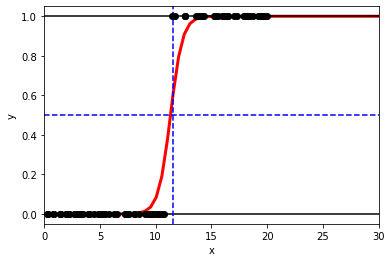

11.557788944723617


In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
X=np.reshape(velocity_list,(len(velocity_list),1))
Y=np.reshape(escaped_list,(len(escaped_list),1))
lr=LogisticRegression()
lr.fit(X,Y)
plt.figure()
plt.scatter(X.ravel(),Y,color='black',zorder=20)
def model(x):
  return 1/(1+np.exp(-x))
X_test=np.linspace(0,100,200)
escaped_chances=model(X_test*lr.coef_+lr.intercept_).ravel()
plt.plot(X_test,escaped_chances,color='red',linewidth=3)
plt.axhline(y=0,color='k',linestyle='-')
plt.axhline(y=1,color='k',linestyle='-')
plt.axhline(y=0.5,color='b',linestyle='--')
plt.axvline(x=X_test[23],color='b',linestyle='--')
plt.ylabel('y')
plt.xlabel('x')
plt.xlim(0,30)
plt.show()
print(X_test[23])

In [15]:
velocity=float(input('enter the velocity of the rocket->  '))
chances=model(velocity*lr.coef_+lr.intercept_).ravel()[0]
if chances<=0.01:
  print('rocket will not escape')
elif chances>=1:
  print('rocket will escape')
elif chances<0.5:
  print('rocket might not escape')
else:
  print('rocket might escape')

enter the velocity of the rocket->  900402342
rocket will escape
